
# TP autoencoder

Diane LINGRAND

diane.lingrand@univ-cotedazur.fr 

In [1]:
import tensorflow
print(tensorflow.__version__)
import tensorflow.keras


2.8.0


In [2]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, UpSampling2D, Lambda
from tensorflow.keras.layers import Dropout
from tensorflow.keras.datasets import mnist

from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import glob
#!pip install tqdm
from tqdm import tqdm
import random
from matplotlib import pyplot as plt

# Part I: playing with the MNIST dataset

In [4]:
# loading the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# preprocessings
x_train = x_train.astype('float32') / 255. # 2D images
x_test = x_test.astype('float32') / 255.
xTrain = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) # 1D images
xTest = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

size1 = len(xTrain[0])
size = len(x_train[0])
print(size,size1)

28 784


## a first simple autoencoder

In [5]:
inputImage = Input(shape=(size1,))
encoded = Dense(size, activation='relu')(inputImage)
decoded = Dense(size1, activation='sigmoid')(encoded)

autoencoder = Model(inputImage, decoded)
autoencoder.compile(optimizer='adam', loss='mse') 
autoencoder.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 28)                21980     
_________________________________________________________________
dense_3 (Dense)              (None, 784)               22736     
Total params: 44,716
Trainable params: 44,716
Non-trainable params: 0
_________________________________________________________________


### another way to display an architecture

In [ ]:
!pip install pydot
!pip install pydotplus
!pip install pydot-ng


In [5]:
import pydot
import pydotplus
import graphviz
from tensorflow.keras import utils

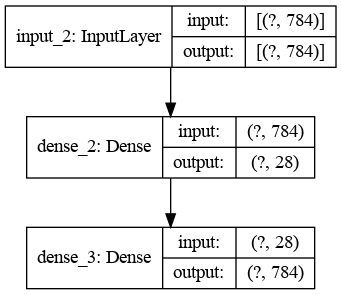

In [7]:
#another way to display the architecture
utils.plot_model( autoencoder, show_layer_names=True,show_shapes=True)

In [ ]:
### learning and evaluation

In [ ]:
### learning the autoencoder
from tensorflow.keras.callbacks import EarlyStopping
ourCallback = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

autoencoder.fit(xTrain, xTrain, epochs=100, batch_size=128, validation_split=0.2, shuffle=True,callbacks=[ourCallback])

In [ ]:
# scores
print("train score = ", autoencoder.evaluate(xTrain,xTrain))
print("test score = ", autoencoder.evaluate(xTest,xTest))

**Question 1**: Are you satisfied with these results ?

In [23]:
xTrainPredicted = autoencoder.predict(xTrain)

image number:  27972
(784,)
(28, 28)


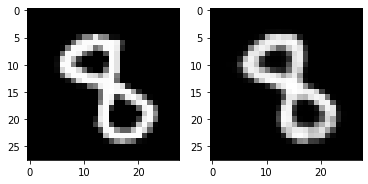

In [24]:
# let's look at a random image and it's encoded-decoded version
index = random.randint(0,len(xTrain)-1)
print("image number: ", index)
im1 = xTrain[index]
im1 = im1.reshape((size,size))
im2 = xTrainPredicted[index]
print(im2.shape)
im2 = im2.reshape((size,size))
print(im2.shape)
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
plt.imshow(im1, cmap='gray')
ax = fig.add_subplot(1, 2, 2)
plt.imshow(im2, cmap='gray')
plt.show()

**Question 2**: Play several times with the previous cell. Are you satisfied with the result ? Try also the next cell.

image number:  2181


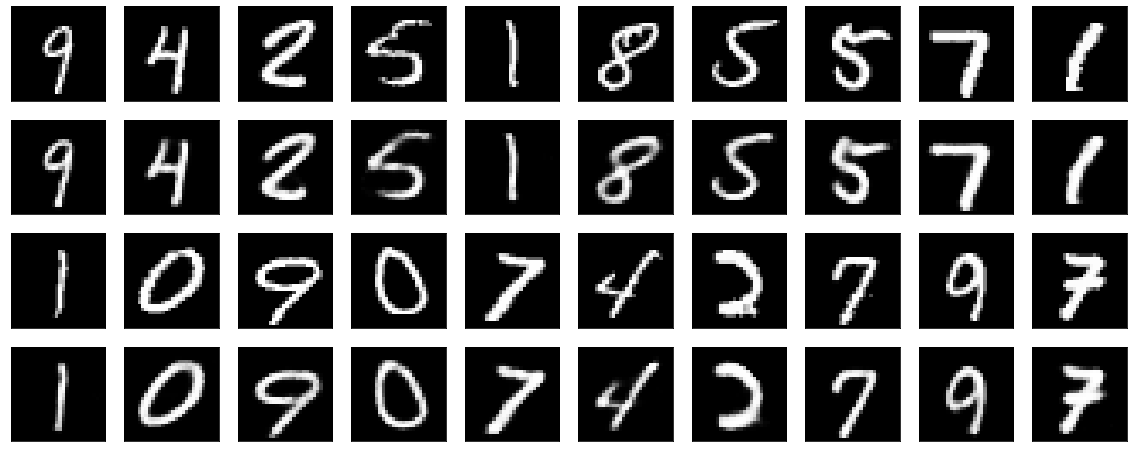

In [25]:
#more images (could also be done on the test dataset)
index = random.randint(0,len(xTrain)-1)
print("image number: ", index)

fig = plt.figure(figsize=(20, 8))
for i in range(1,11):
    index = random.randint(0,len(xTrain)-1)
    im1 = xTrain[index]
    im1 = im1.reshape((size,size))
    im2 = xTrainPredicted[index]
    im2 = im2.reshape((size,size))
    ax = fig.add_subplot(4, 10, i)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(im1, cmap='gray')
    ax = fig.add_subplot(4, 10, i+10)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(im2, cmap='gray')
    
    index = random.randint(0,len(xTrain)-1)
    im1 = xTrain[index]
    im1 = im1.reshape((size,size))
    im2 = xTrainPredicted[index]
    im2 = im2.reshape((size,size))
    ax = fig.add_subplot(4, 10, i+20)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(im1, cmap='gray')
    ax = fig.add_subplot(4, 10, i+30)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(im2, cmap='gray')
plt.show()

**Question 3**:If you are not satisfied, go back to the definition, compiling and/or training of this network in order to improve the results.

## a more complex autoencoder

In [20]:
inputImage = Input(shape=(size1,))
encoded = Dense(500, activation='relu')(inputImage)
encoded = Dense(250, activation='relu')(encoded)
encoded = Dense(28, activation='relu')(encoded)
decoded = Dense(250, activation='relu')(encoded)
decoded = Dense(500, activation='relu')(decoded)
decoded = Dense(size1, activation='sigmoid')(decoded)

autoencoder = Model(inputImage, decoded)
autoencoder.compile(optimizer='adam', loss='mse') 
autoencoder.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_5 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_6 (Dense)              (None, 28)                7028      
_________________________________________________________________
dense_7 (Dense)              (None, 250)               7250      
_________________________________________________________________
dense_8 (Dense)              (None, 500)               125500    
_________________________________________________________________
dense_9 (Dense)              (None, 784)              

**Question 4**: Change the architecture, run, evaluate ...

## a convolutional autoencoder

In [12]:
inputImage = Input(shape=(size,size,1))
encoded = Conv2D(8, (3, 3), activation='relu', padding='same')(inputImage)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)
encoded = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)
decoded = UpSampling2D((2,2))(encoded)
decoded = Conv2D(8, (3, 3), activation='relu', padding='same')(decoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(8, (3, 3), activation='relu',padding='same')(decoded)
decoded = Conv2D(1, (3,3), activation='relu',padding='same')(decoded)
autoencoder = Model(inputImage,decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [5]:
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         584       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)        

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
ourCallback = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

autoencoder.fit(x_train, x_train, epochs=100, batch_size=128, validation_split=0.2, shuffle=True,callbacks=[ourCallback])

## separate encoding and decoding

In [ ]:
# encoder part
inputImage = Input(shape=(size1,))
encoded = Dense(500, activation='relu')(inputImage)
encoded = Dense(250, activation='relu')(encoded)
encoded = Dense(28, activation='relu')(encoded)
# decoder part
decoded = Dense(250, activation='relu')(encoded)
decoded = Dense(500, activation='relu')(decoded)
decoded = Dense(size1, activation='sigmoid')(decoded)

# autoencoder model that will be learned
autoencoder = Model(inputImage, decoded)
autoencoder.compile(optimizer='adam', loss='mse') 
autoencoder.fit(xTrain, xTrain, epochs=100, batch_size=128, validation_split=0.2, shuffle=True,callbacks=[ourCallback])
autoencoder.summary()

#encoder model: weigths are already learned
encoderModel = Model(inputImage, encoded)
encoderModel.summary()
# decoder model (adapt this code to your network): weigths are already learned
inputLatent = Input(shape=(28,)) 
decoder = autoencoder.layers[-3](inputLatent)
decoder = autoencoder.layers[-2](decoder)
decoder = autoencoder.layers[-1](decoder)
decoderModel = Model(inputLatent,decoder)
decoderModel.summary()

In [19]:
#encoder model: weigths are already learned
encoderModel = Model(inputImage, encoded)
encoderModel.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 8)         584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 8)           0         
Total params: 664
Trainable params: 664
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# decoder model (adapt this code to your network): weigths are already learned
inputLatent = Input(shape=(28,)) 
decoder = autoencoder.layers[-3](inputLatent)
decoder = autoencoder.layers[-2](decoder)
decoder = autoencoder.layers[-1](decoder)
decoderModel = Model(inputLatent,decoder)
decoderModel.summary()

In [ ]:
#For a single data:
index = random.randint(0,len(xTest)-2)
print("image number: ", index)
im = x_test[index]

# encoding of an image
latentData = encoderModel.predict(np.array([im,]))

print("shape = ",latentData.shape)

decodedData = decoderModel.predict(latentData)
print("shape2 = ", decodedData.shape)


In [ ]:
#display
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
plt.imshow(im.reshape(28,28), cmap='gray')
ax = fig.add_subplot(1,2,2)

plt.imshow(decodedData[0].reshape(28,28), cmap='gray')
plt.show()

**Question 6**: Modify the last 2 cells in order to add noise (or small perturbations) to the latent representation and display the decoded image.

In [23]:
bruit = tensorflow.random.normal([7,7,8], 0, 0.1, tensorflow.float32)

In [ ]:
print(bruit)
nouv = latentData + bruit

# Part II: playing with the animals10 dataset

In [ ]:
# download the dataset
from google.colab import drive
drive.mount('/content/drive/')
datasetRoot='/content/drive/My Drive/raw-img/'

In [ ]:
# or work localy using already downloaded dataset
# modify to your local directory
datasetRoot='/home/lingrand/Ens/MachineLearning/animals/raw-img/'

In [ ]:

classes = ['mucca', 'elefante']#, 'gatto', 'cavallo', 'scoiattolo', 'ragno', 'pecora', 'farfalla', 'gallina', 'cane']
#training data

rootTrain = datasetRoot+'train/'
size = 224 # eventually, try different image size reductions
size2 = size*size
nbImages = 0
for cl in classes:
    nbImages += len(glob.glob(rootTrain+cl+'/*'))
xTrain = np.empty(shape=(nbImages,size2))
print("total number of images: ",len(xTrain))
i = 0
for cl in tqdm(classes):
    listImages = glob.glob(rootTrain+cl+'/*')
    print("class: ", cl, " : ", len(listImages)) 
    for pathImg in tqdm(listImages): 
        img = image.load_img(pathImg, target_size=(size, size),color_mode='grayscale')
        im = image.img_to_array(img)
        im = np.reshape(im,size2)
        im /= 255.0
        xTrain[i, :] = im 
        i += 1
print(xTrain.shape)



## Let us build an autoencoder

In [ ]:

inputImage = Input(shape=(size2,))
encoded = Dense(4000, activation='relu')(inputImage)
encoded = Dense(2000, activation='relu')(encoded)

decoded = Dense(4000, activation='relu')(encoded)
decoded = Dense(size2, activation='sigmoid')(decoded)

autoencoder = Model(inputImage, decoded)
autoencoder.compile(optimizer='adam', loss='mse') 
print(autoencoder.summary())

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
ourCallback = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=0, mode='auto', baseline=None, restore_best_weights=True)


In [ ]:
#learning
autoencoder.fit(xTrain, xTrain, epochs=100,batch_size=256, validation_split=0.2, shuffle=True,callbacks=[ourCallback])

In [ ]:
print("score = ", autoencoder.evaluate(xTrain,xTrain))

In [ ]:
# predictions
xTrainPredicted = autoencoder.predict(xTrain)


In [ ]:
# let's look at the differences

index = random.randint(0,len(xTrain)-1)
print("image number: ", index)
im1 = xTrain[index]
im1 = im1.reshape((size,size))
im2 = xTrainPredicted[index]
print(im2.shape)
im2 = im2.reshape((size,size))
print(im2.shape)
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
plt.imshow(im1, cmap='gray')
ax = fig.add_subplot(1, 2, 2)
plt.imshow(im2, cmap='gray')
plt.show()

Try also to plot more images.

## From dense to convolutional layers
Change the Dense layers to Conv2D layers and add Pooling layers. 

In [ ]:
# prepare the data
x_train = xTrain.reshape(nbImages,size,size)

In [ ]:
print(x_train.shape)

In [ ]:
# your work is to try different architectures in order to find the best reconstruction / reduction of latent representation
#  encoder part

inputImage = tensorflow.keras.Input(shape=(size, size, 1))
encoded = Conv2D(2, (3, 3), activation='relu', padding='same')(inputImage)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)
encoded = Conv2D(2, (3, 3), activation='relu', padding='same')(encoded)
encoded = MaxPooling2D((2, 2), padding='valid')(encoded)

#  decoding part
decoded = Conv2D(2, (3, 3), activation='relu', padding='same')(encoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(2, (3, 3), activation='relu', padding='same')(decoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoded)

autoencoder = Model(inputImage, decoded)
autoencoder.compile(optimizer='adam', loss='mse') 
autoencoder.summary()

**Question**: Will it be possible to train this network ?

In [ ]:
# compile, run, test, ... as in previous section
autoencoder.fit(x_train, x_train, epochs=100,batch_size=256, validation_split=0.2, shuffle=True,callbacks=[ourCallback])

In [ ]:
print("score = ", autoencoder.evaluate(x_train,x_train))
xTrainPredictedConv = autoencoder.predict(xTrain)

In [ ]:
# let's look at the differences

index = random.randint(0,len(x_train)-1)
print("image number: ", index)
im1 = x_train[index]
im2 = xTrainPredicted[index]
im2 = im2.reshape((size,size))
im3 = xTrainPredictedConv[index]
print(im3.shape)
fig = plt.figure()
ax = fig.add_subplot(1, 3, 1)
plt.imshow(im1, cmap='gray')
ax = fig.add_subplot(1, 3, 2)
plt.imshow(im2, cmap='gray')
ax = fig.add_subplot(1, 3, 3)
plt.imshow(im3[:,:,0], cmap='gray')
plt.show()

## Perturbation on the latent representation

In this section, we will perturb the latent representation before decoding. Perturbations will be represented as additive noise. We will also explore the latent space by searching for latent vectors in the neighbourhood of some latent representation of training samples and see how the decoding representation looks like.

In [ ]:
# encoder model 
encoderModel = Model(inputImage, encoded)
# decoder model (adapt this code to your network)
inputLatent = Input(shape=(33,33,2)) # to adapt to your network
decoder = autoencoder.layers[-3](inputLatent)
decoder = autoencoder.layers[-2](decoder)
decoder = autoencoder.layers[-1](decoder)
decoderModel = Model(inputLatent,decoder)

In [ ]:
# ATTENTION: à adapter à votre réseau
index = random.randint(0,len(xTrain)-2)
print("image number: ", index)
im1 = xTrain[index]
jm1 = xTrain[index+1]
# encoding of an image
latentData1 = encoderModel.predict(np.array([im1,]))
latentData2 = encoderModel.predict(np.array([jm1,]))
# perturbation on the latent representation (you have to try different values/distributions for epsilon)
epsilon = 0.1
# first idea: add noise to the latent representation
#latentData += np.random.uniform(-epsilon, epsilon, size=(1,33,33,16))
print("shape = ",latentData.shape)
# second idea : use the mean from 2 latent representations
# decoding of the latent representation
latentData = 0.5*(latentData1+latentData2)
decodedData = decoderModel.predict(latentData)
print("shape2 = ", decodedData.shape)
#display
fig = plt.figure()
ax = fig.add_subplot(1, 3, 1)
plt.imshow(im1, cmap='gray')
ax = fig.add_subplot(1,3,2)
plt.imshow(jm1, cmap='gray')
ax = fig.add_subplot(1, 3, 3)
plt.imshow(decodedData[0,:,:,0], cmap='gray')
plt.show()

# Part III: using compact representation for classification algorithm

## Let's learn first an autoencoder

In [ ]:
# encoder part
inputImage = Input(shape=(size1,))
encoded = Dense(500, activation='relu')(inputImage)
encoded = Dense(250, activation='relu')(encoded)
encoded = Dense(28, activation='relu')(encoded)
# decoder part
decoded = Dense(250, activation='relu')(encoded)
decoded = Dense(500, activation='relu')(decoded)
decoded = Dense(size1, activation='sigmoid')(decoded)

# autoencoder model that will be learned
autoencoder = Model(inputImage, decoded)
autoencoder.compile(optimizer='adam', loss='mse') 
autoencoder.fit(xTrain, xTrain, epochs=100, batch_size=128, validation_split=0.2, shuffle=True,callbacks=[ourCallback])
autoencoder.summary()

#encoder model: weigths are already learned
encoderModel = Model(inputImage, encoded)
encoderModel.summary()
# decoder model (adapt this code to your network): weigths are already learned
inputLatent = Input(shape=(28,)) 
decoder = autoencoder.layers[-3](inputLatent)
decoder = autoencoder.layers[-2](decoder)
decoder = autoencoder.layers[-1](decoder)
decoderModel = Model(inputLatent,decoder)
decoderModel.summary()

In [ ]:
# We need to compute the latent representation of the whole dataset
latentXtrain = encoderModel.predict(xTrain)
latentXtest = encoderModel.predict(xTest)

## Now ready for the classification

In [ ]:
# any classification algorithm: eg SVM
classif = SCV(C=1.0, kernel="linear")
SCV.fit(latentXtrain, y_train)

# Part IV: Variational Autoencoder (VAE)
## Let's start again with the MNIST dataset
We assume the distribution of latent data to be gaussian: 2 parameters: mu and sigma (or log(sigma))

In [59]:
## ENCODER PART
#Encoder starting at 784, one hidden layer with 256 and latent dimension dimLatent
dimLatent = 28
inputImage = Input(shape=(size1,))
encoded = Dense(512, activation='relu')(inputImage)
encoded = Dense(256, activation='relu')(encoded)
# this is the new part
zMu = Dense(dimLatent)(encoded)
zLogSigma = Dense(dimLatent)(encoded)


In [60]:
## SAMPLE GENERATION PART
from tensorflow.keras import backend as bk

def sampling(args):
    mu, logSigma = args
    epsilon = bk.random_normal(shape=(bk.shape(mu)[0], dimLatent), mean=0.0, stddev=0.1)
    # z = mu + sigma * epsilon
    return mu + bk.exp(logSigma) * epsilon

We will use a <a href="https://keras.io/api/layers/core_layers/lambda/">Lambda</a> layer for wrapping the sampling function to a keras layer.

In [61]:
z = Lambda(sampling)([zMu, zLogSigma])

In [62]:
# Create encoder model
encoder = Model(inputImage, [zMu, zLogSigma, z]) #, name='encoder')


In [63]:
## DECODER PART and DECODER MODEL
latent = Input(shape=(dimLatent,))#, name='z_sampling')
decoded = Dense(256, activation='relu')(latent)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(size1, activation='sigmoid')(decoded)
decoder = Model(latent, decoded) #, name='decoder')


In [92]:
## THE WHOLE VAE that will be trained
# for using only z in the latent space, we ask for the component 2 of [zMu, zLogSigma, z]
outputImage = decoder(encoder(inputImage)[2])
vae = Model(inputImage, outputImage)


In [93]:
from tensorflow.keras.losses import binary_crossentropy, mean_squared_error
## Loss function is composed of 2 terms:
# 1 - reconstruction loss
reconstruction_loss = mean_squared_error(inputImage, outputImage)
reconstruction_loss *= size1
print(reconstruction_loss)
# 2 - Kullback-Leibner loss
kl_loss = 1 + zLogSigma - bk.square(zMu) - bk.exp(zLogSigma)
kl_loss = bk.sum(kl_loss, axis=-1)
kl_loss *= -0.5
print(zMu)
print(kl_loss)
# vae loss
vae_loss = bk.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')


KerasTensor(type_spec=TensorSpec(shape=(None,), dtype=tf.float32, name=None), name='tf.math.multiply_12/Mul:0', description="created by layer 'tf.math.multiply_12'")
KerasTensor(type_spec=TensorSpec(shape=(None, 28), dtype=tf.float32, name=None), name='dense_7/BiasAdd:0', description="created by layer 'dense_7'")
KerasTensor(type_spec=TensorSpec(shape=(None,), dtype=tf.float32, name=None), name='tf.math.multiply_13/Mul:0', description="created by layer 'tf.math.multiply_13'")


In [94]:
from tensorflow.keras.callbacks import EarlyStopping
ourCallback = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10, verbose=0, mode='auto', baseline=None, restore_best_weights=True)


In [95]:
## training
vae.fit(xTrain, xTrain, epochs=100, batch_size=128, validation_split=0.2, shuffle=True,callbacks=[ourCallback])
#vae.summary()

Epoch 1/100
375/375 [==============================] - 4s 9ms/step - loss: 7.9892 - val_loss: 8.4871
Epoch 2/100
375/375 [==============================] - 3s 9ms/step - loss: 7.9060 - val_loss: 8.6161
Epoch 3/100
375/375 [==============================] - 3s 9ms/step - loss: 7.8966 - val_loss: 8.5372
Epoch 4/100
375/375 [==============================] - 3s 9ms/step - loss: 7.8709 - val_loss: 8.4985
Epoch 5/100
375/375 [==============================] - 3s 9ms/step - loss: 7.8700 - val_loss: 8.5238
Epoch 6/100
375/375 [==============================] - 3s 9ms/step - loss: 7.8510 - val_loss: 8.5176
Epoch 7/100
375/375 [==============================] - 3s 9ms/step - loss: 7.8325 - val_loss: 8.4826
Epoch 8/100
375/375 [==============================] - 3s 9ms/step - loss: 7.8435 - val_loss: 8.4986
Epoch 9/100
375/375 [==============================] - 3s 9ms/step - loss: 7.8410 - val_loss: 8.5153
Epoch 10/100
375/375 [==============================] - 3s 9ms/step - loss: 7.8356 - val_lo

In [70]:
latent = encoder.predict(xTest)
output = vae.predict(xTest)

In [84]:
np.mean(tensorflow.keras.losses.MSE(xTest,output))

0.006172466

In [77]:
print('score =', vae.get_loss(xTest,output))

AttributeError: 'Functional' object has no attribute 'get_loss'

In [69]:
encoder.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 512)          401920      ['input_3[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 256)          131328      ['dense_5[0][0]']                
                                                                                                  
 dense_7 (Dense)                (None, 28)           7196        ['dense_6[0][0]']                
                                                                                            

**Question 1:** Observe the encoding/decoding of some of the digits from the test dataset.
    

In [44]:
# prepare the xTest: already done at the beginning of partI

# predict the xTest outputs by the vae model
xTestPredicted = vae.predict(xTest)
 

image number:  1445


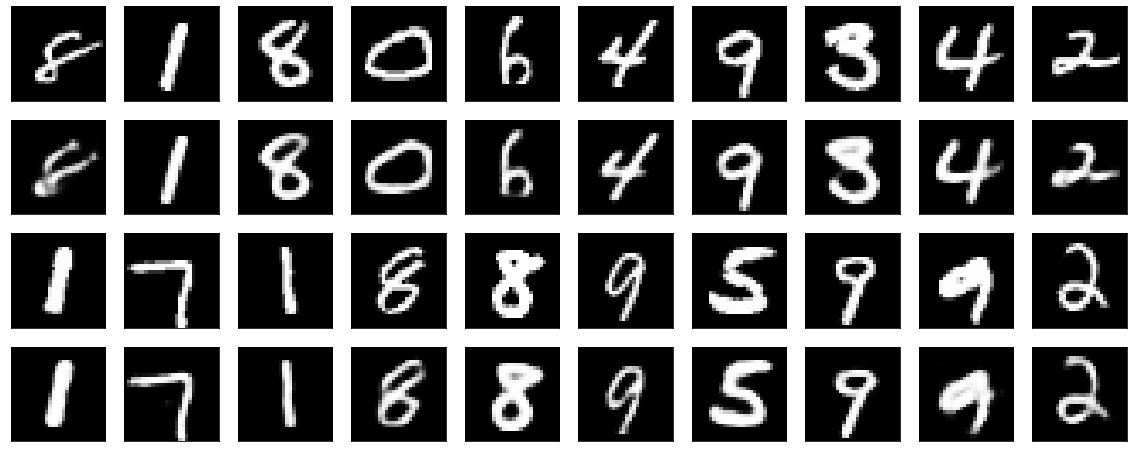

In [45]:
# display/plot some of the xTest images together with their corresponding xTestPredicted
index = random.randint(0,len(xTest)-1)
print("image number: ", index)

fig = plt.figure(figsize=(20, 8))
for i in range(1,11):
    index = random.randint(0,len(xTest)-1)
    im1 = xTest[index]
    im1 = im1.reshape((size,size))
    im2 = xTestPredicted[index]
    im2 = im2.reshape((size,size))
    ax = fig.add_subplot(4, 10, i)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(im1, cmap='gray')
    ax = fig.add_subplot(4, 10, i+10)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(im2, cmap='gray')
    
    index = random.randint(0,len(xTest)-1)
    im1 = xTest[index]
    im1 = im1.reshape((size,size))
    im2 = xTestPredicted[index]
    im2 = im2.reshape((size,size))
    ax = fig.add_subplot(4, 10, i+20)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(im1, cmap='gray')
    ax = fig.add_subplot(4, 10, i+30)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(im2, cmap='gray')
plt.show()

**Question 2:** Now, you can generate new samples. Start with the latent representation of a digit, as for example an '8', compute it's latent representation (mean and variance) and generate new latent representations. Decode them: do they look similar ?

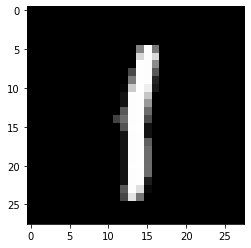

In [19]:
# let's take a random image
index = random.randint(0,len(xTest)-1)
im = xTest[index]
im = im.reshape((size,size))
plt.imshow(im,cmap='gray')

In [20]:
mu = latent[0][index]
lS = latent[1][index]
# generate n new samples
n=10
mu10 = np.empty(shape=(n,28), dtype=np.float32)
lS10 = np.empty(shape=(n,28), dtype=np.float32)
for i in range(n):
    mu10[i] = mu.copy()
    lS10[i] = lS.copy()+i*0.1
z = sampling([mu10,lS10])
print(z.shape)
#sigma = exp(lS) => sigma * e = exp(lS)*exp(1)= exp(lS+1)

(10, 28)


In [21]:
generated = decoder.predict(z)

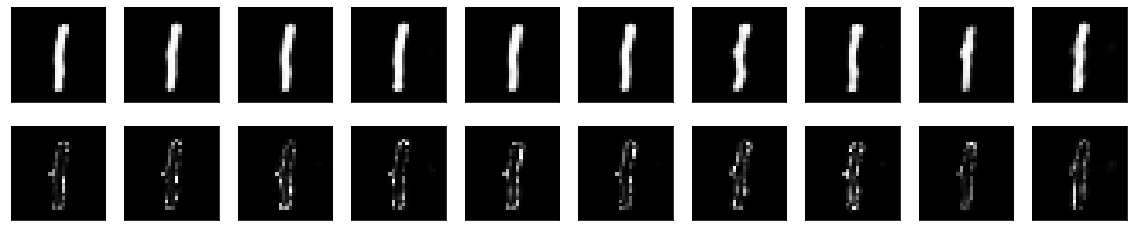

In [22]:
# we draw the new generated image and the difference with the original image
fig = plt.figure(figsize=(20, 4))
for i in range(0,n):
    im1 = generated[i]
    im1 = im1.reshape((size,size))
    ax = fig.add_subplot(2, 10, i+1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(im1, cmap='gray')
    im1 = np.abs(im1 - im)
    ax = fig.add_subplot(2, 10, n+i+1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(im1, cmap='gray')

**Question 3:** Generate new latent representation as linear combinaison of other latent from the same class.

In [46]:
#random samples from the same class
n1 = random.randint(0,len(xTest))
y = y_test[n1]

n2 = n1
while (n2==n1) or (y_test[n2] != y):
    n2 = random.randint(0,len(xTest))
print('class :', y, '#', n1, 'and #', n2)
mu = (latent[0][n1]+latent[0][n2])/2.0
lS = (latent[1][n1]+latent[1][n2])/2.0


class : 5 # 1272 and # 7542


In [47]:
# generate n new samples
n=10
mu10 = np.empty(shape=(n,28), dtype=np.float32)
lS10 = np.empty(shape=(n,28), dtype=np.float32)
for i in range(n):
    mu10[i] = mu.copy()
    lS10[i] = lS.copy()+i*0.1
z = sampling([mu10,lS10])

In [48]:
generated = decoder.predict(z)

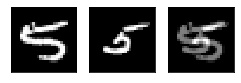

In [49]:
fig = plt.figure(figsize=(4, 2))
im1 = xTest[n1]
im1 = im1.reshape((size,size))
ax = fig.add_subplot(1, 3, 1)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.imshow(im1, cmap='gray')
im1 = xTest[n2]
im1 = im1.reshape((size,size))
ax = fig.add_subplot(1, 3, 2)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.imshow(im1, cmap='gray')
im1 = (xTest[n1]+xTest[n2])/2
im1 = im1.reshape((size,size))
ax = fig.add_subplot(1, 3, 3)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.imshow(im1, cmap='gray')

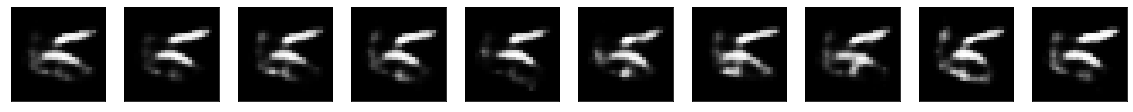

In [50]:
fig = plt.figure(figsize=(20, 2))
for i in range(0,n):
    im1 = generated[i]
    im1 = im1.reshape((size,size))
    ax = fig.add_subplot(1, 10, i+1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(im1, cmap='gray')

### moving along one latent axis

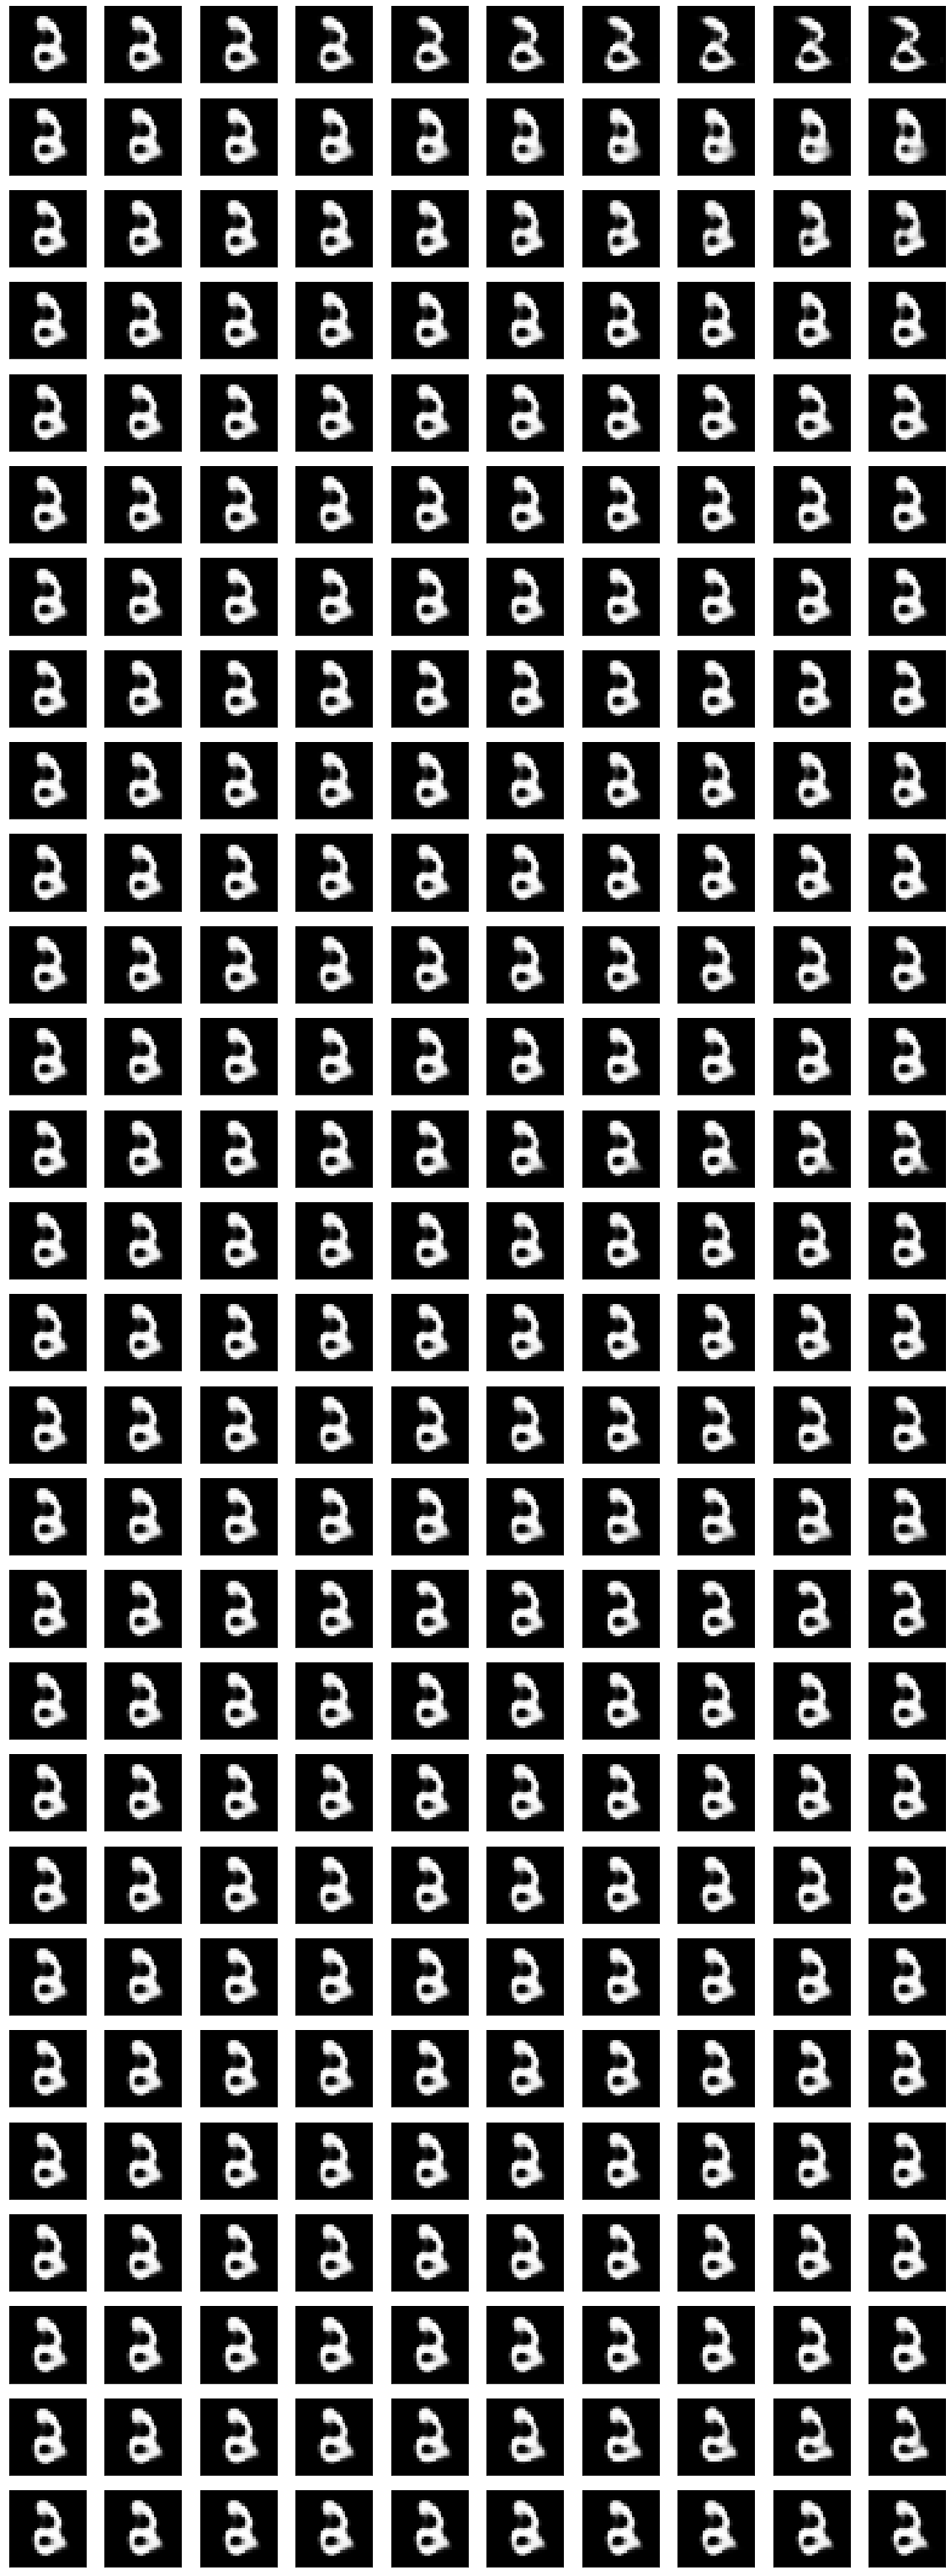

In [51]:
#class : 2 # 1546 and # 3510
n1 = 1546
n2 = 3510
lat = latent.copy()

fig = plt.figure(figsize=(20, 56))
#axis = random.randint(0,len(latent[0][n1]))
#print('axis=',axis)
#start = latent[0][n1][axis]
#end = latent[0][n2][axis]
#step = (end-start)/10
j=1
for axis in range(28):
   # print(axis, start, end, step)
    start = lat[0][n1][axis]
    end = lat[0][n2][axis]
    step = (end-start)/10
    mu1 = lat[0][n1:n1+1]
    for i in np.arange(start,end,step):
        mu1[0][axis] = i
        gen = decoder.predict(mu1)
        im1 = gen.reshape((size,size))
        ax = fig.add_subplot(28, 10, j)
        j+=1
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.imshow(im1, cmap='gray')
    mu1[0][axis]=start

### start with 2 latent representation and linearly interpolate other latent vectors from these 2 latent representation.

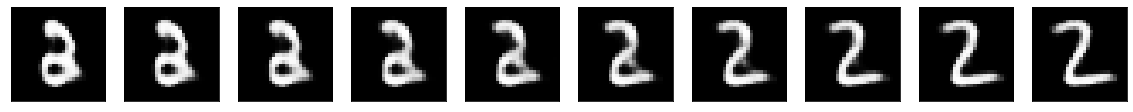

In [54]:
#class : 2 # 1546 and # 3510
n1 = 1546
n2 = 3510
lat = latent.copy()

fig = plt.figure(figsize=(20, 2))
#axis = random.randint(0,len(latent[0][n1]))
#print('axis=',axis)
#start = latent[0][n1][axis]
#end = latent[0][n2][axis]
#step = (end-start)/10
j=1
start = lat[0][n1]
end = lat[0][n2]
step = (end-start)/10
mu1 = lat[0][n1:n1+1]
for i in range(10):
    gen = decoder.predict(np.array([start,]))
    im1 = gen.reshape((size,size))
    ax = fig.add_subplot(1, 10, j)
    j+=1
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(im1, cmap='gray')
    start += step

In [52]:
lat[0].shape

(10000, 28)

### Random sampling in the latent space

(20, 28)
[ 0.16905236 -0.16061863 -0.41195816  0.49780925 -0.95933569 -0.36048788
 -0.98240632 -0.81937359 -0.31514361  0.36151396 -0.64159681  0.1539964
 -0.24208499 -0.05279547 -0.24379668  0.42477739  0.8222622   0.52621142
  0.87457175  0.34662972 -0.3275129   0.01484884  0.4686633  -0.29842075
 -0.64477107  0.79216236 -0.96076053  0.85415275]


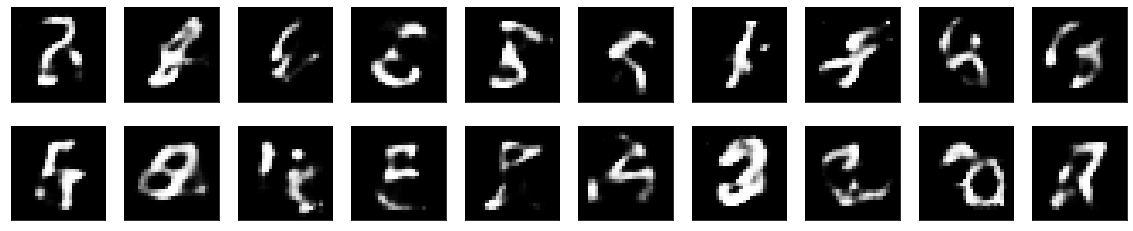

In [58]:
fig = plt.figure(figsize=(20, 4))
latentAleatoire = np.random.random_sample((20,28))*2 -1
print(latentAleatoire.shape)
print(latentAleatoire[0])
gen = decoder.predict(latentAleatoire)
for i in range(20):
    im1 = gen[i].reshape((size,size))
    ax = fig.add_subplot(2, 10, i+1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(im1, cmap='gray')

In [ ]:
## Generate an artificial dataset
By starting with some images and adding translation, rotation. See if it is possible to 

## Now play with a real image dataset
The <a href="http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html">CelebA</a> available directly in tensorflow: https://www.tensorflow.org/datasets/catalog/celeb_a )
